<a href="https://colab.research.google.com/github/aravindb212/Lung_cancer_classification_DCNN/blob/main/Lung_Cancer_classification_using_DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# File Directory for both the train and test
train_path = "/content/drive/MyDrive/Dataset/Data/train"
val_path = "/content/drive/MyDrive/Dataset/Data/valid"
test_path = "/content/drive/MyDrive/Dataset/Data/test"

In [ ]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

FileNotFoundError: ignored

In [ ]:
#!pip install matplotlib --upgrade
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

NameError: ignored

## Importing Keras for Image Classification

In [ ]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 624 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [ ]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [ ]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

## CNN Model

In [ ]:
model = Sequential()

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu' ))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=480, kernel_size=(3,3), activation='relu' ))
model.add(Conv2D(filters=480, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=832, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(filters=1024, kernel_size=(3,3), activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=300, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 348, 348, 32)      896       
                                                                 
 batch_normalization_94 (Bat  (None, 348, 348, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 174, 174, 32)     0         
 2D)                                                             
                                                                 
 conv2d_101 (Conv2D)         (None, 172, 172, 64)      18496     
                                                                 
 conv2d_102 (Conv2D)         (None, 170, 170, 64)      36928     
                                                                 
 batch_normalization_95 (Bat  (None, 170, 170, 64)    

In [ ]:
#model = Sequential()

# Convolutional Layer with input shape (350,350,3)
#model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

#model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Dropout(rate=0.25))

#model.add(Flatten())
#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(rate=0.25))
#model.add(Dense(units=4, activation='sigmoid'))

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 128)       7

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model
cnn = model.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size,
    epochs = 32,
    validation_data = val_data,
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

NameError: ignored

In [ ]:
# Loading the Best Fit Model
model = load_model("./ct_cnn_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
accuracy_cnn = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 53.015875816345215 %


In [ ]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

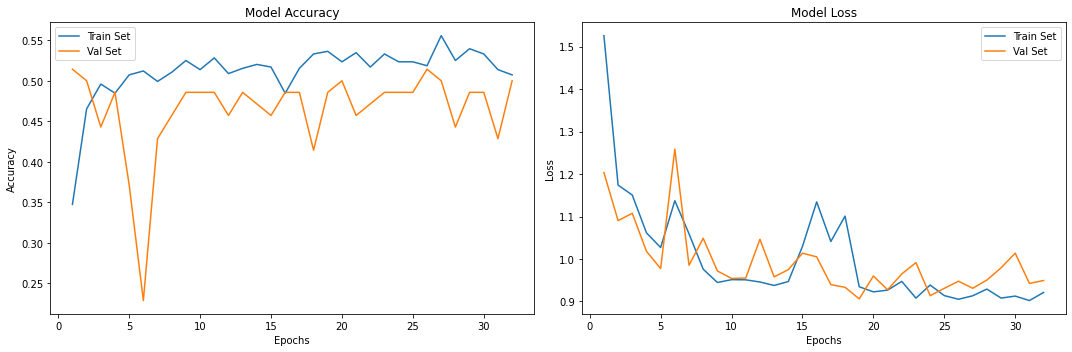

In [ ]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## VGG16 Model

In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(350,350,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_2 (Dropout)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 204804    
                                                                 
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size,
    epochs = 32,
    validation_data = val_data,
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/32
124/124 [==============================] - ETA: 0s - loss: 2.5834 - accuracy: 0.4814
Epoch 1: val_accuracy improved from -inf to 0.42857, saving model to ./ct_vgg_best_model.hdf5
124/124 [==============================] - 27s 200ms/step - loss: 2.5834 - accuracy: 0.4814 - val_loss: 1.3969 - val_accuracy: 0.4286
Epoch 2/32
124/124 [==============================] - ETA: 0s - loss: 1.7872 - accuracy: 0.5670
Epoch 2: val_accuracy improved from 0.42857 to 0.55714, saving model to ./ct_vgg_best_model.hdf5
124/124 [==============================] - 24s 192ms/step - loss: 1.7872 - accuracy: 0.5670 - val_loss: 2.1703 - val_accuracy: 0.5571
Epoch 3/32
124/124 [==============================] - ETA: 0s - loss: 1.5496 - accuracy: 0.6220
Epoch 3: val_accuracy improved from 0.55714 to 0.57143, saving model to ./ct_vgg_best_model.hdf5
124/124 [==============================] - 24s 191ms/step - loss: 1.5496 - accuracy: 0.6220 - val_loss: 1.3271 - val_accuracy: 0.5714
Epoch 4/32
124/124 [==

In [ ]:
# Loading the Best Fit Model
model = load_model("./ct_vgg_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
accuracy_vgg = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 75.87301731109619 %


In [ ]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

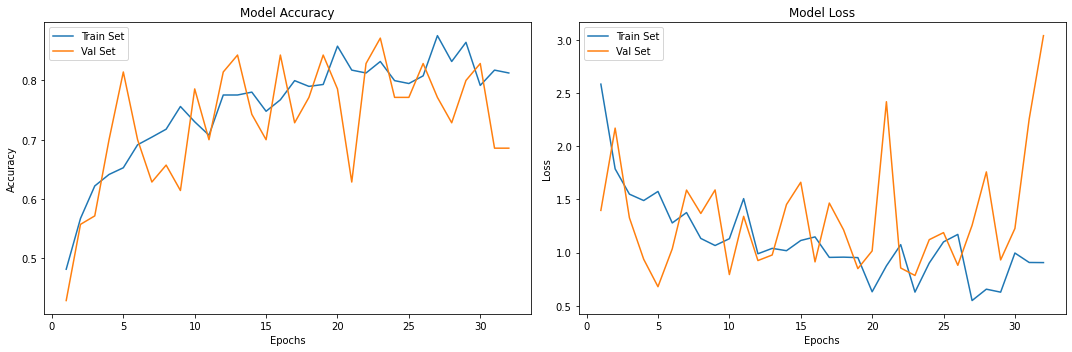

In [ ]:
# Plot model performance
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Inceptionv3 Model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (350, 350, 3),
                         include_top = False,
                         weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_incep_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model
incep = model_incep.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size,
    epochs = 32,
    validation_data = val_data,
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/32
124/124 [==============================] - ETA: 0s - loss: 8.5475 - accuracy: 0.4540
Epoch 1: val_accuracy improved from -inf to 0.48571, saving model to ./ct_incep_best_model.hdf5
124/124 [==============================] - 39s 269ms/step - loss: 8.5475 - accuracy: 0.4540 - val_loss: 6.3867 - val_accuracy: 0.4857
Epoch 2/32
124/124 [==============================] - ETA: 0s - loss: 4.0279 - accuracy: 0.5363
Epoch 2: val_accuracy did not improve from 0.48571
124/124 [==============================] - 24s 190ms/step - loss: 4.0279 - accuracy: 0.5363 - val_loss: 5.8193 - val_accuracy: 0.4571
Epoch 3/32
124/124 [==============================] - ETA: 0s - loss: 2.2744 - accuracy: 0.6058
Epoch 3: val_accuracy improved from 0.48571 to 0.62857, saving model to ./ct_incep_best_model.hdf5
124/124 [==============================] - 30s 242ms/step - loss: 2.2744 - accuracy: 0.6058 - val_loss: 1.8173 - val_accuracy: 0.6286
Epoch 4/32
124/124 [==============================] - ETA: 0s - 

In [ ]:
# Loading the Best Fit Model
model = load_model("./ct_incep_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
accuracy_incep = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 83.49206447601318 %


In [ ]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

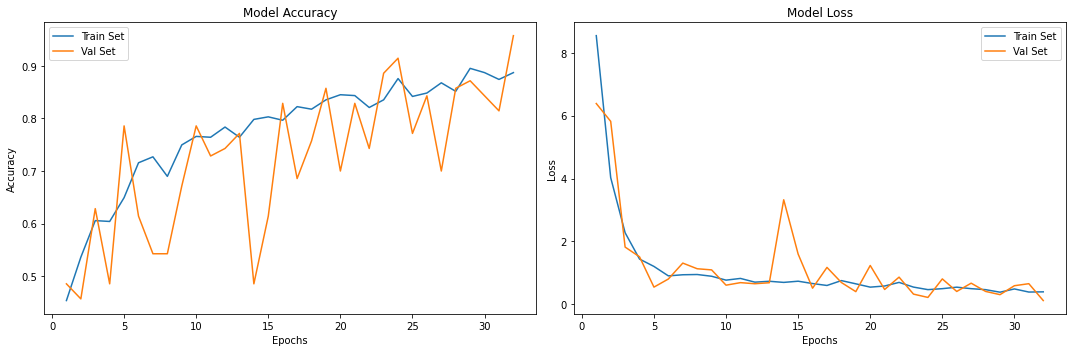

In [ ]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## RestNet50 Model

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet",
                      pooling='max')

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [mc];

In [ ]:
# Fitting the Model
resnet = model_incep.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size,
    epochs = 32,
    validation_data = val_data,
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/32
124/124 [==============================] - ETA: 0s - loss: 0.5179 - accuracy: 0.8595
Epoch 1: val_accuracy improved from -inf to 0.84286, saving model to ./ct_resnet_best_model.hdf5
124/124 [==============================] - 33s 266ms/step - loss: 0.5179 - accuracy: 0.8595 - val_loss: 0.4770 - val_accuracy: 0.8429
Epoch 2/32
124/124 [==============================] - ETA: 0s - loss: 0.3975 - accuracy: 0.8885
Epoch 2: val_accuracy improved from 0.84286 to 0.91429, saving model to ./ct_resnet_best_model.hdf5
124/124 [==============================] - 32s 257ms/step - loss: 0.3975 - accuracy: 0.8885 - val_loss: 0.3780 - val_accuracy: 0.9143
Epoch 3/32
124/124 [==============================] - ETA: 0s - loss: 0.5268 - accuracy: 0.8756
Epoch 3: val_accuracy did not improve from 0.91429
124/124 [==============================] - 28s 229ms/step - loss: 0.5268 - accuracy: 0.8756 - val_loss: 0.5982 - val_accuracy: 0.8286
Epoch 4/32
124/124 [==============================] - ETA: 0s 

In [ ]:
# Loading the Best Fit Model
model = load_model("./ct_resnet_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
accuracy_resnet = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_resnet*100} %")

The accuracy of the model is = 84.1269850730896 %


In [ ]:
resnet.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

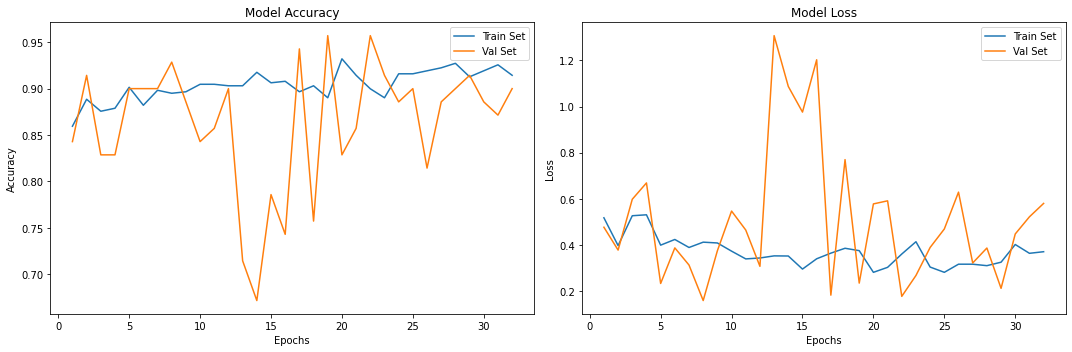

In [ ]:
# Plot model performance
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Comparison

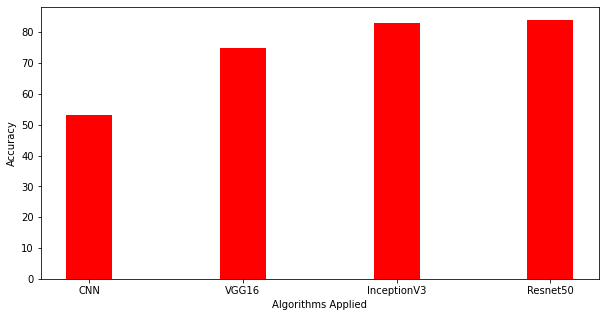

In [ ]:
algos = ['CNN', 'VGG16', 'InceptionV3', 'Resnet50']
accuracy = [accuracy_cnn, accuracy_vgg, accuracy_incep, accuracy_resnet]
accuracy = np.floor([i * 100 for i in accuracy])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(algos, accuracy, color ='red', width = 0.3)

plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

### Predictions

In [ ]:
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(350,350))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [ ]:
path = "/content/drive/MyDrive/Lung_CT/train/ade/1-04 (10).jpeg"
chestScanPrediction(path,model_incep)

1/1 [==============================] - 2s 2s/step
Squamous cell carcinoma
